In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = "../data/train.csv"
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [3]:
tX0 = tX

In [4]:
y.shape, tX.shape, ids.shape

((250000,), (250000, 30), (250000,))

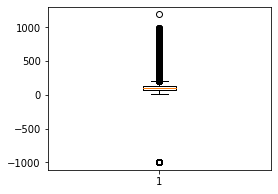

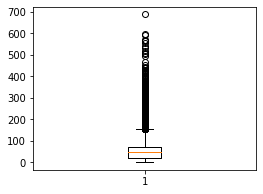

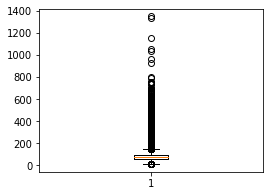

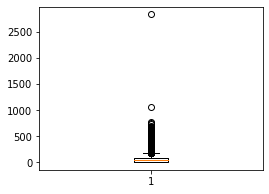

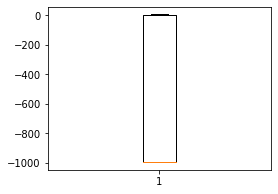

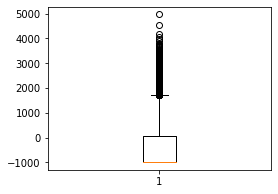

In [5]:
'''boxplot of some features to get an idea of the distribution'''
plt.figure(figsize=(4,3))
plt.boxplot(tX[:,0])
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(tX[:,1])
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(tX[:,2])
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(tX[:,3])
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(tX[:,4])
plt.show()
plt.figure(figsize=(4,3))
plt.boxplot(tX[:,5])
plt.show()

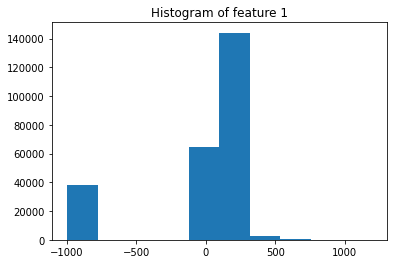

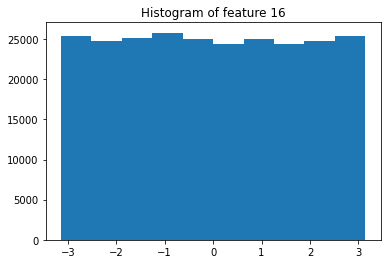

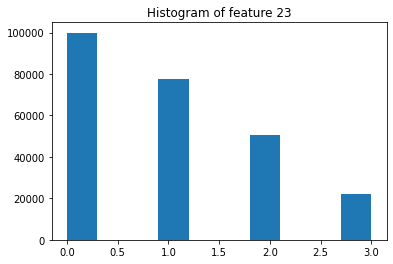

In [6]:
# histogram of some features
plt.hist(tX[:,0])
plt.title('Histogram of feature 1')
plt.show()

plt.hist(tX[:,15])
plt.title('Histogram of feature 16')
plt.show()

plt.hist(tX[:,22])
plt.title('Histogram of feature 23')
plt.show()

With these histograms, we see that some features have constinuous distribution while others have discrete distribution

In [7]:
def indices_outliers(feature):
    '''find outliers indices''' 
    Q1 = np.percentile(feature, 25)
    Q3 = np.percentile(feature, 75)
    IQR = Q3 - Q1 # interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ind_out = []
    for idx in range (len(feature)):
        if ((feature[idx] < lower_bound) or (feature[idx] > upper_bound)):
            ind_out.append(idx)
    # return the indices of the feature that contain outliers
    return ind_out     

In [155]:
out = []
for i in range (tX.shape[1]):
    ind = indices_outliers(tX[:,i])
    out.append(len(ind))
print(out)

[49357, 1850, 14611, 13891, 0, 1176, 0, 644, 8632, 12289, 9566, 0, 0, 13925, 0, 0, 13434, 0, 0, 13299, 0, 10307, 0, 0, 0, 0, 0, 0, 0, 11153]


In [8]:
def treating_outliers(feature):
    '''replace outliers'values by the mean'''
    indices = np.arange(0, len(feature))
    ind_out = indices_outliers(feature)
    ind_in = np.delete(indices, ind_out)
    ind_in = ind_in.reshape(-1)
    f_mean = feature[ind_in].mean()
    feature[ind_out] = f_mean
    # return feature with outliers' values replaced by the mean (without outliers' values)
    return feature

In [9]:
'''clean data from outliers'''
for i in range (tX.shape[1]):
    tX[:,i] = treating_outliers(tX[:,i])

In [10]:
'''standardization'''
tX = (tX - np.mean(tX, axis=0)) / np.std(tX, axis=0) # standardize each column

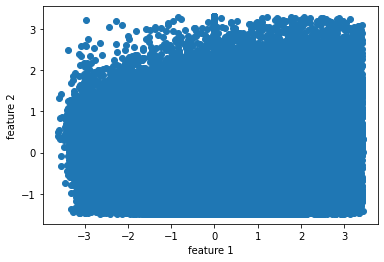

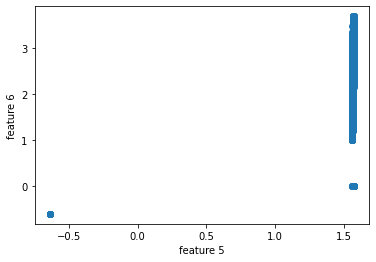

In [11]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(tX[:,0], tX[:,1])
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
plt.show()

fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(tX[:,4], tX[:,5])
ax.set_xlabel('feature 5')
ax.set_ylabel('feature 6')
plt.show()

In [12]:
'''correlation matrix'''
C = np.corrcoef(tX.T) # correlation coefficient between features
                      # C is a 30x30 array
                      # Cij is the correlation coefficient between feature i and feature j 
# Select upper triangle of correlation matrix
C = np.triu(C, k=0)

'''get rid of features with correlation coefficient > 0.9'''
threshold = 0.95
corr_features = []
for i in range(len(C[0])):
    for j in range(len(C[0])):
        if ((i != j) and C[i][j] > threshold):
            corr_features.append([i, j])
corr_features

[[4, 5],
 [4, 6],
 [4, 12],
 [4, 26],
 [4, 27],
 [4, 28],
 [5, 6],
 [5, 12],
 [5, 26],
 [5, 27],
 [5, 28],
 [6, 12],
 [6, 26],
 [6, 27],
 [6, 28],
 [12, 26],
 [12, 27],
 [12, 28],
 [23, 24],
 [23, 25],
 [24, 25],
 [26, 27],
 [26, 28],
 [27, 28]]

In [14]:
corr_feat_to_delete = [corr_features[0][0]]
for i in range (1, len(corr_features)):
    if (corr_features[i][0] != corr_features[i-1][0]):
        corr_feat_to_delete.append(corr_features[i][0])

tX = np.delete(tX, corr_feat_to_delete, axis = 1)     

In [16]:
tX.shape

(250000, 22)

##### Find and Delete constant features

In [17]:
def constant_feature (feature):
    constant = feature[0]
    for i in range (len(feature)):
        if (feature[i] != constant):
            return False
    return True

In [18]:
def clean_constant_features(tX):
    for i in range (tX.shape[1]):
        if (constant_feature(tX[:,i]) == True):
            tX = np.delete(tX, i, axis = 1)
    return tX

In [19]:
tX = clean_constant_features(tX)

#### Least Squares

In [20]:
from implementation import least_squares
mse, w_least_squares = least_squares(y, tX)
print("train mse: " + str(mse))

train mse: 0.3853132642038239


#### Least Squares Gradient Descent

In [22]:
from implementation import least_squares_GD
initial_w = np.zeros(tX.shape[1])
mse, w_least_squares_GD = least_squares_GD(y, tX, initial_w, max_iters = 100, gamma = 0.7)
print("train mse: " + str(mse))

train mse: 2.010003687276371e+100


In [23]:
'''choose the w we want to use for the submission and the tX_test'''
weights = w_least_squares_GD

## Generate predictions and save ouput in csv format for submission:

In [24]:
DATA_TEST_PATH = "../data/test.csv"
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [25]:
_.shape, tX_test.shape, ids_test.shape

((568238,), (568238, 30), (568238,))

In [26]:
OUTPUT_PATH = '../data/output.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

ValueError: shapes (568238,30) and (22,) not aligned: 30 (dim 1) != 22 (dim 0)